<a href="https://colab.research.google.com/github/Avinashbairagi/Resume-screenig/blob/main/Book_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libararies

In [206]:
# Importing Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

from scipy.sparse import hstack

from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn import metrics

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Resume screening /UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
#Different categories of jobs
df["Category"].unique() 

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
df["Category"].nunique() 

25

In [ ]:
# Visualisation of content inside the text
df["Resume"][0] 

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
# Here we can visualized tha we lot of un necessary tags and digit inside the text
# Text preprocessing required


In [ ]:
categories = df['Category'].value_counts().reset_index()
categories


,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


# EDA

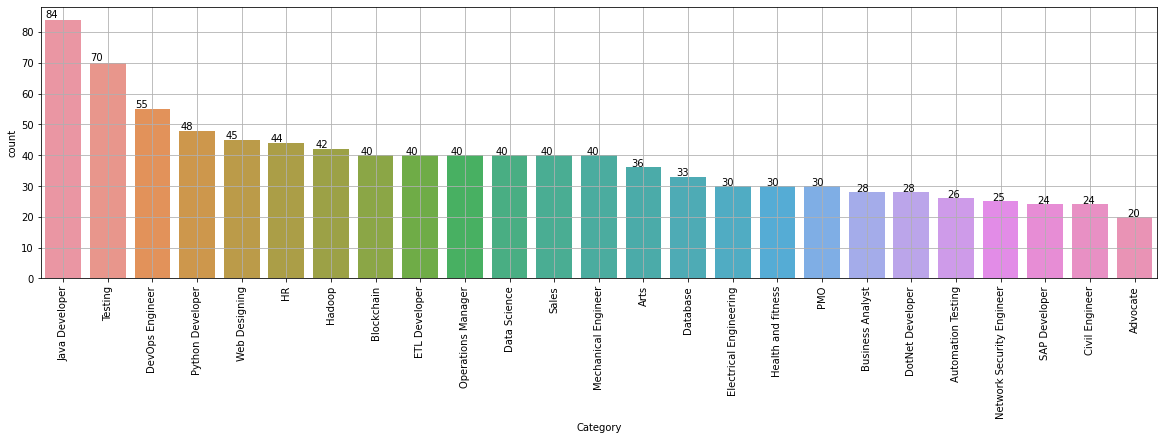

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df,order= df["Category"].value_counts().index)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

# New section

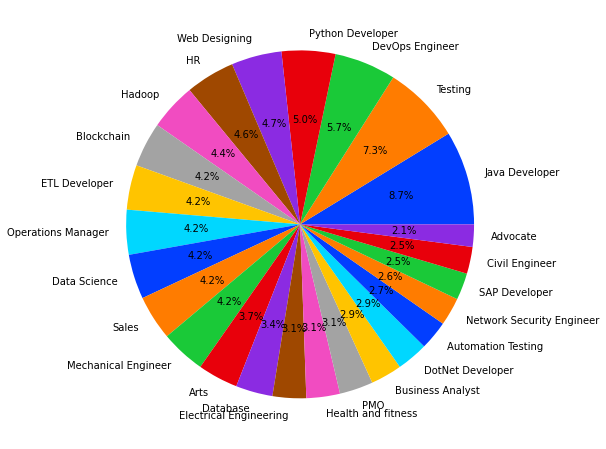

In [ ]:
plt.figure(figsize=(18,8))
colors = sns.color_palette("bright")
plt.pie(x = categories["Category"], labels= categories["index"], colors= colors, autopct= '%.1f%%')
plt.show()

# Text preprocessing

In [ ]:
# Creating Function to remove URLs, hashtags, mentions, special letters and punctuation
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub(r'[0-9]+', '', resumeText)  #Remove numbers
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
df["clean_resume"] = df["Resume"].apply(lambda x: clean_function(x))
df.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May to May B E UIT RGPV Data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df["clean_resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the review proce

In [ ]:
# From the above cell we can see that few words are in upper case few are in lower case .
# Normalization is required
def lower_case(data):
  return data.lower()

In [ ]:
df["clean_resume"] = df["clean_resume"].apply(lambda x: lower_case(x))
df.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
df["clean_resume"][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the review proce

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# word_tokens = word_tokenize(df["clean_resume"][0])
# word_tokens

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Now each and every words are in lower case 
# Lets remove stop words
def remove_stop(data):
  stop_words = set(stopwords.words('english'))
  word_tokens = RegexpTokenizer(r'\w+').tokenize(data)
  filtered_sentence = [word for word in word_tokens if word not in stop_words and word not in string.punctuation]
  text = " ".join(filtered_sentence)
  return text







In [ ]:
# # Checking for text with and without stopwords
# df["clean_resume"][0] 
# remove_stop(df["clean_resume"][0])

In [ ]:
# Removing Stop words from data_set
df["clean_resume"] = df["clean_resume"].apply(lambda x: remove_stop(x))

In [ ]:
df.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
# df["clean_resume"][0]

In [ ]:
def lemmatization(data):
    tokens = word_tokenize(data)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    lemma = WordNetLemmatizer()
    final_text =[]
    for i in tokens:
        lemmatized_word = lemma.lemmatize(i)
        final_text.append(lemmatized_word)
    return " ".join(final_text)
       

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df["clean_resume"] = df["clean_resume"].apply(lambda x: lemmatization(x))
df

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may b e uit rgpv data sci...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...
958,Testing,â Willingness to accept the challenges. â ...,willingness ept challenge positive thinking go...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge m power poin...


In [ ]:
df["clean_resume"][100]

'skill natural language proficient english hindi marathi computer skill proficient m office internet operation education detail january january llb law mumbai maharashtra mumbai university january b mumbai maharashtra k somaiya college mumbai university h c asmita girl junior college maharashtra board c vidya bhawan maharashtra board advocate llb student journalist skill detail company detail company criminal lawyer law firm description'

In [ ]:
df["clean_resume"][101]

'skill legal writing efficient researcher legal education family law criminal defence environment law litigation business legal issue banking law commercial laweducation detail january llm criminology pune maharashtra university pune january llb law pune maharashtra university pune january diploma labour law pune maharashtra university pune advocate advocate skill detail legal writing exprience month litigation exprience monthscompany detail company family criminal district session court description legal consultancy service co operative bank scheduled bank private bank client federal bank chinchwad pune bharat co operative bank chinchwad pune icici bank scope work finalising loan agreement mortgage agreement release deed notice intimation title deed search report case legal notice recovery due filing summary suit paper notice power attorney indemnity bond family law legal consultancy representation matter relating family dispute marriage divorce su ession adoption etc lok adalat panel

# Word cloud

In [ ]:
stop_words= set(stopwords.words('english'))
Total_word = []
Sentences= df['clean_resume'].values #storing all the resume in single senteces
cleanedSentences= ""
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in stop_words and word not in string.punctuation:
            Total_word.append(word)
wordfreqdist = nltk.FreqDist(Total_word)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('project', 4071), ('exprience', 3829), ('company', 3639), ('month', 3344), ('detail', 3132), ('description', 3122), ('team', 2159), ('data', 2156), ('skill', 2067), ('management', 2024), ('system', 1954), ('database', 1533), ('year', 1515), ('client', 1472), ('maharashtra', 1449), ('application', 1394), ('service', 1380), ('technology', 1370), ('testing', 1349), ('test', 1297), ('requirement', 1274), ('business', 1273), ('report', 1240), ('le', 1217), ('development', 1204), ('server', 1202), ('developer', 1200), ('customer', 1182), ('ltd', 1177), ('process', 1166), ('responsibility', 1137), ('using', 1124), ('sql', 1121), ('january', 1090), ('java', 1076), ('engineering', 1055), ('work', 1038), ('pune', 1026), ('c', 987), ('role', 969), ('user', 916), ('software', 901), ('education', 898), ('operation', 895), ('pvt', 879), ('sale', 845), ('activity', 832), ('environment', 800), ('design', 786), ('technical', 767)]


In [ ]:
def wordcloud(data,column):  ## need to gve all data at once in large string
  df = data[column].str.cat(sep=' ') ## create large string with \n in it
  text = " ".join([word for word in df.split() ])  # removes \n from it

  word_cloud = WordCloud(width=700,height=400,background_color='white',min_font_size=10).generate(text)
  plt.figure(figsize=(14,16))
  plt.imshow(word_cloud)
  plt.show()

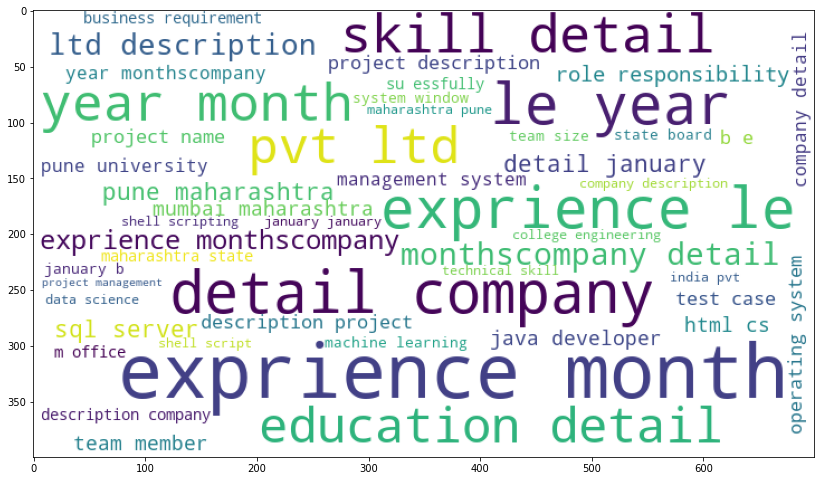

In [ ]:
wordcloud(df,"clean_resume") 


# Model Building

In [144]:
df1 = df.copy()

In [145]:
df1.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may b e uit rgpv data sci...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [146]:
from sklearn.preprocessing import LabelEncoder
df1= df.copy()
df1['Category']= LabelEncoder().fit_transform(df1['Category'])
df1.head()

,Category,Resume,clean_resume
0,6,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may b e uit rgpv data sci...
2,6,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [149]:
len(df1['Category'].unique())

25

In [148]:
df["Category"].nunique()

25

In [151]:
df1.drop('Resume', axis =1,inplace = True)
df1.head()

,Category,clean_resume
0,6,skill programming language python panda numpy ...
1,6,education detail may may b e uit rgpv data sci...
2,6,area interest deep learning control system des...
3,6,skill r python sap hana tableau sap hana sql s...
4,6,education detail mca ymcaust faridabad haryana...


In [185]:
x = df1["clean_resume"]
y = df1['Category']

In [189]:
x

0      skill programming language python panda numpy ...
1      education detail may may b e uit rgpv data sci...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      education detail mca ymcaust faridabad haryana...
                             ...                        
957    computer skill proficient m office word basic ...
958    willingness ept challenge positive thinking go...
959    personal skill quick learner eagerness learn n...
960    computer skill software knowledge m power poin...
961    skill set o window xp database mysql sql serve...
Name: clean_resume, Length: 962, dtype: object

In [190]:
y

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [209]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(193,)
(769,)
(769,)
(193,)


# COUNT Vectorizer

In [210]:
count = CountVectorizer(max_df = 0.95, max_features = 1000, lowercase = True)  ## create model instance
count_train = count.fit_transform(x_train)  ## fit and transforming the training data
count_test = count.transform(x_test)   ## only transforming the testing data to avoid data leakage.


In [211]:
count_train.A

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [212]:
pd.DataFrame(count_train.A, columns = count.get_feature_names())  ## creating data set 


,ability,academic,achieve,achieved,achievement,achieving,across,action,active,actively,...,workflow,working,workshop,world,writing,wrote,www,xml,xp,year
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,4,0,0,0,...,0,2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,0,1,0,0,0,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,3
765,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
767,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [201]:
# pd.DataFrame(count_test.A, columns = count.get_feature_names())  ## creating data set 


In [213]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Decesion Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayse' : MultinomialNB(),
    'XG Boost' : XGBClassifier()}

In [214]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=DecisionTreeClassifier()),
 OneVsRestClassifier(estimator=RandomForestClassifier()),
 OneVsRestClassifier(estimator=GradientBoostingClassifier()),
 OneVsRestClassifier(estimator=MultinomialNB()),
 OneVsRestClassifier(estimator=XGBClassifier())]

In [215]:
for model in model_list:
    model.fit(count_train, y_train)
    print(f'{model} trained')
print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=GradientBoostingClassifier()) trained
OneVsRestClassifier(estimator=MultinomialNB()) trained
OneVsRestClassifier(estimator=XGBClassifier()) trained
************************************************************
all models trained


In [216]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(count_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(count_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9648894668400521
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.9689119170984456
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.9844559585492227
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.9948186528497409
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=DecisionTreeClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=DecisionTreeClassifier()) o

In [218]:
# Classification report and accuracy
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(count_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      0.88      0.93         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       0.80      1.00      0.89        12
          13       1.00      1.00      1.00         4
          14       1.00      1.0

# TFIDF

In [220]:
tfidf = TfidfVectorizer(max_df = 0.95, max_features = 1000, lowercase = True) ## creating model instance
tfidf_train = tfidf.fit_transform(x_train) ## fit and transforming training data
tfidf_test = tfidf.transform(x_test)  ## transforming testing data


In [221]:
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=DecisionTreeClassifier()),
 OneVsRestClassifier(estimator=RandomForestClassifier()),
 OneVsRestClassifier(estimator=GradientBoostingClassifier()),
 OneVsRestClassifier(estimator=MultinomialNB()),
 OneVsRestClassifier(estimator=XGBClassifier())]

In [222]:
for model in model_list:
    model.fit(tfidf_train, y_train)
    print(f'{model} trained')
print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=GradientBoostingClassifier()) trained
OneVsRestClassifier(estimator=MultinomialNB()) trained
OneVsRestClassifier(estimator=XGBClassifier()) trained
************************************************************
all models trained


In [223]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(tfidf_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(tfidf_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.988296488946684
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.9844559585492227
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.9960988296488946
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.9948186528497409
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.9948186528497409
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=DecisionTreeClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=DecisionTreeC